# Tu primer random forest con scikit-learn

In [2]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [5]:
#Cargamos dataset a utilizar
df = pd.read_csv("pima-indians-diabetes.csv",  header=None) #header=None para que no se lea la primera fila como nombre de las columnas
# cambiando el nombre de columnas
df.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#Mostramos los ultimos 5 registros del dataset
df.tail()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Exploración de datos

In [6]:
#Visualizacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Renombramos las columnas


In [8]:
#Verificacion de datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
label,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [9]:
#Analizamos el shape del objeto
df.shape

(768, 9)

In [10]:
#Visualizamos los tipos de datos
df.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [11]:
#Separamos en X e y
from sklearn.model_selection import train_test_split
X = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Importamos las librerias necesarias para la creacion del modelo

#30% para test y 70% para train


In [12]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
rfc  = RandomForestClassifier(n_estimators=100, random_state=42) #n_estimators es el numero de arboles que se crearan
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Entrenamiento


In [13]:
#Calculo de las predicciones en Train y Test
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

## Evaluación del modelo

In [14]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Calculo el accuracy en Train
acc_train = accuracy_score(y_train, y_pred_train)
print("Accuracy en Train: ", acc_train)

#Calculo el accuracy en Test
acc_test = accuracy_score(y_test, y_pred_test)
print("Accuracy en Test: ", acc_test)

Accuracy en Train:  1.0
Accuracy en Test:  0.7532467532467533


/home/joelinux/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joelinux/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

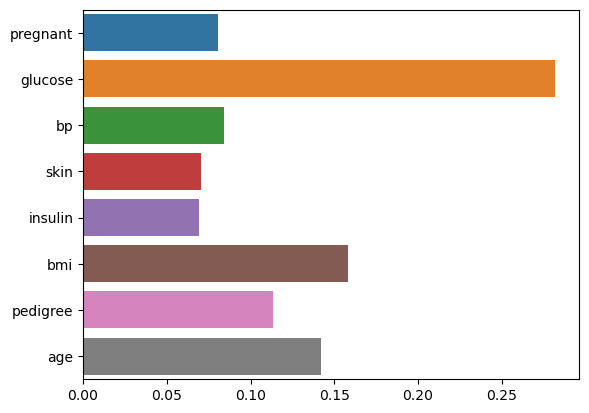

In [15]:
#Verificamos el feature importances
rfc.feature_importances_
# Mostrar
import seaborn as sns
sns.barplot(x=rfc.feature_importances_, y=X_train.columns)

In [18]:
feature_importances_df = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False) #.sort_values('importance', ascending=False) para ordenar de mayor a menor

<Axes: >

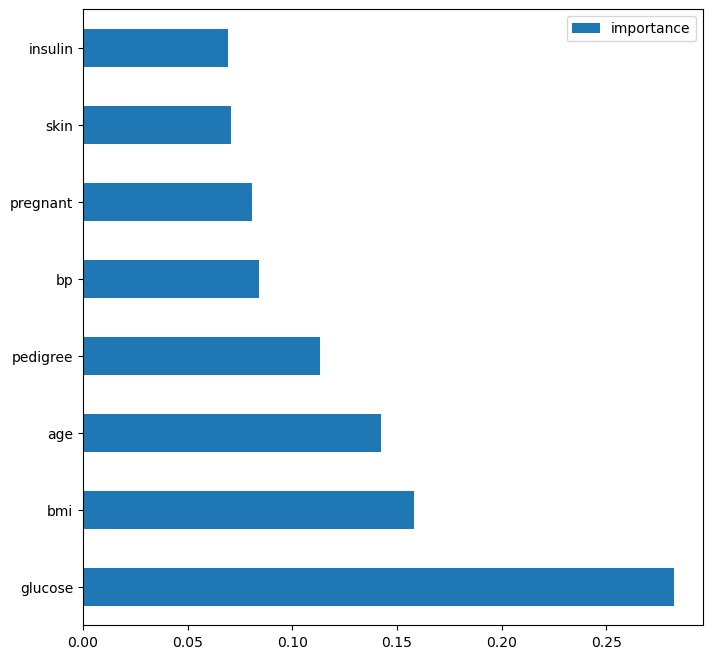

In [25]:
feature_importances_df.plot(kind='barh', figsize=(8, 8))

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**